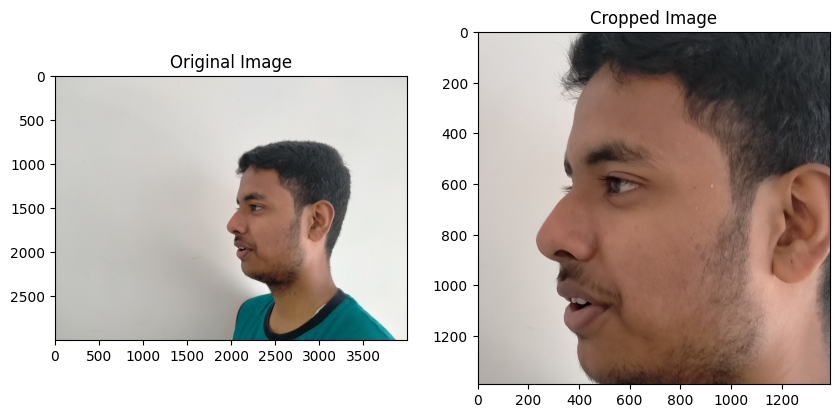

In [45]:
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt

input_file_path = 'image.jpg'
side_face_cascade = cv2.CascadeClassifier('haarcascade_profileface.xml')
# Load the input image
img = cv2.imread(input_file_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect side view faces
side_faces = side_face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Crop the side view faces
for (x, y, w, h) in side_faces:
    side_face = img[y:y+h, x:x+w]
    # Replace the original image with the cropped image
    cv2.imwrite('image_cropped.jpg', side_face)

# Load the original and cropped images
original_image = cv2.cvtColor(cv2.imread(input_file_path), cv2.COLOR_BGR2RGB)
cropped_image = cv2.cvtColor(cv2.imread('image_cropped.jpg'), cv2.COLOR_BGR2RGB)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image in the first subplot
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

# Plot the cropped image in the second subplot
axs[1].imshow(cropped_image)
axs[1].set_title('Cropped Image')

# Show the figure
plt.show()


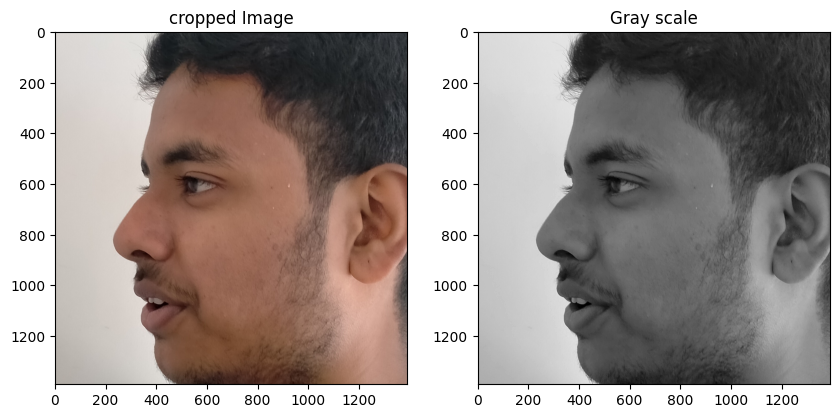

In [46]:
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image in the first subplot
axs[0].imshow(cropped_image)
axs[0].set_title('cropped Image')

# Plot the cropped image in the second subplot
axs[1].imshow(gray_image, cmap='gray')
axs[1].set_title('Gray scale')

# Show the figure
plt.show()

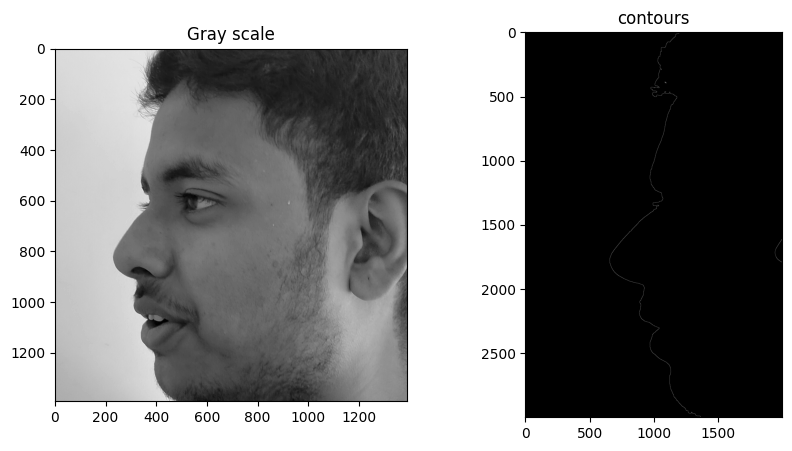

In [47]:
import numpy as np
# Apply Gaussian blur to the grayscale image to remove noise
blur = cv2.GaussianBlur(gray_image, (7, 7), 0)

# Apply Otsu's thresholding to obtain a binary image
_, binary = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Apply morphology to remove small objects from the foreground
kernel = np.ones((5,5), np.uint8)
morphed = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Resize the mask to match the size of the original image
morphed = cv2.resize(morphed, (original_image.shape[1], original_image.shape[0]))

# Apply the mask to the original image
result = cv2.bitwise_and(original_image, original_image, mask=morphed)
# Get the width and height of the image
height, width = result.shape[:2]

# Crop the left half of the image
cropped_face = result[:, :width//2]
# Convert to grayscale
gray = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Apply Canny edge detector with threshold values
edges = cv2.Canny(blurred, 30, 90)
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image in the first subplot
axs[1].imshow(edges,cmap='gray')
axs[1].set_title('contours')

# Plot the cropped image in the second subplot
axs[0].imshow(gray_image, cmap='gray')
axs[0].set_title('Gray scale')

# Show the figure
plt.show()

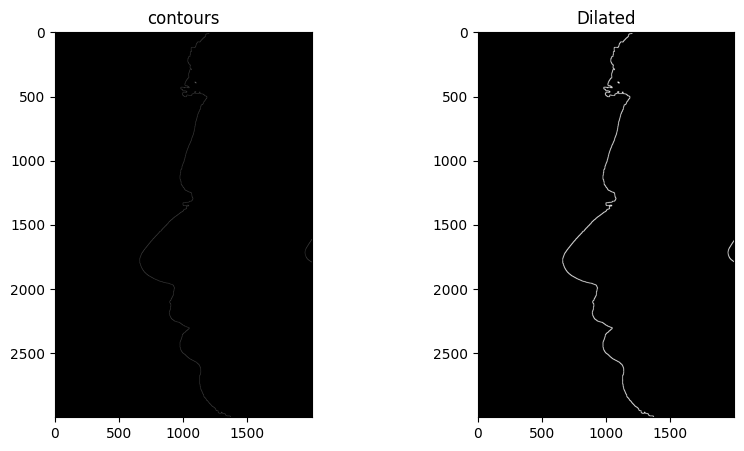

In [48]:
# Create a structuring element for dilation
kernel = np.ones((5, 5), np.uint8)

# Dilate the edges to thicken the contours
dilated = cv2.dilate(edges, kernel, iterations=1)
cv2.imwrite('image_contour.jpg', dilated)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image in the first subplot
axs[0].imshow(edges,cmap='gray')
axs[0].set_title('contours')

# Plot the cropped image in the second subplot
axs[1].imshow(dilated, cmap='gray')
axs[1].set_title('Dilated')

# Show the figure
plt.show()


In [50]:
# Load the image
Im = Image.open('image_contour.jpg')
RIm = Im.resize((10, 10))

# Convert the resized image to a NumPy array
arr = np.asarray(RIm.getdata())

# Print the array
print(arr)

[ 0  0  0  0  2  9  1  0  0  0  0  0  0  0  5 15  1  0  0  0  0  0  0  0
  1  8  0  0  0  0  0  0  0  0  4  5  0  0  0  0  0  0  0  0  8  7  0  0
  0  0  0  0  0  8  4  0  0  0  0  4  0  0  0  6  7  0  0  0  0  1  0  0
  0  0  9  3  0  0  0  0  0  0  0  0  3  8  0  0  0  0  0  0  0  0  0  6
  6  0  0  0]


In [58]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
size_=100000
Im = Image.open('image_contour.jpg')
RIm = Im.resize((size_, size_))

# Convert the resized image to a NumPy array
arr = np.asarray(RIm.getdata())

# Reshape the array into a 10x10 shape
arr_reshaped = np.reshape(arr, (size_, size_))

# Display the image
plt.imshow(arr_reshaped, cmap='gray')
plt.show()
